In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from scipy.stats import norm

In [3]:
yedioth_raw_data = pd.read_excel("./Yedioth_Data.xlsx", sheet_name="Raw")

In [4]:
yedioth_raw_data

,Date,Customer Number,Sales Agent,Quantity Distributed,Quantity Added,Distributed + Added,Sales,Returned,Sell Through
0,2008-07-14,1,1,6,0,6,2,4,0
1,2008-07-21,1,1,6,0,6,5,1,0
2,2008-07-28,1,1,6,0,6,6,0,1
3,2008-08-11,1,1,6,0,6,5,1,0
4,2008-08-18,1,1,7,0,7,4,3,0
...,...,...,...,...,...,...,...,...,...
2103,2009-10-26,50,5,7,0,7,2,5,0
2104,2009-11-09,50,5,6,0,6,6,0,1
2105,2009-11-16,50,5,5,0,5,4,1,0
2106,2009-11-23,50,5,5,0,5,4,1,0


## Ask a simple Question: What are average sales by Customer Number?

In [5]:
basic_average = yedioth_raw_data['Sales'].mean()

In [6]:
basic_average

4.137096774193548

In [7]:
grouped_average = yedioth_raw_data.groupby(by=["Customer Number"])

In [8]:
grouped_average

In [9]:
grouped_average['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Number,,,,,,,,
1,45.0,4.266667,1.763261,0.0,3.00,4.0,5.00,8.0
2,38.0,5.447368,1.940986,2.0,4.00,5.0,7.00,10.0
3,46.0,1.608696,0.744708,0.0,1.00,1.5,2.00,3.0
4,46.0,1.804348,1.185459,0.0,1.00,2.0,2.00,5.0
5,46.0,3.086957,1.457945,0.0,2.00,3.0,4.00,7.0
6,46.0,3.608696,1.731772,0.0,2.00,3.5,5.00,7.0
7,41.0,3.926829,1.602970,1.0,3.00,4.0,5.00,7.0
8,46.0,14.434783,3.913806,7.0,12.00,14.5,17.50,22.0
9,45.0,4.733333,1.615268,0.0,4.00,5.0,6.00,8.0


## Find Sales by Customer (Store) grouped by Agent

In [11]:
grouped_by_cust_agents = yedioth_raw_data.groupby(by=["Customer Number", "Sales Agent"])

In [13]:
grouped_by_cust_agents.describe()

Quantity Distributed                             \
                                           count       mean       std   min   
Customer Number Sales Agent                                                   
1               1                           45.0   6.511111  1.079188   5.0   
2               2                           38.0   7.473684  1.870639   5.0   
3               3                           46.0   2.717391  0.750201   2.0   
4               3                           46.0   3.717391  1.293798   2.0   
5               4                           46.0   5.130435  1.408051   3.0   
6               5                           46.0   6.000000  1.154701   3.0   
7               6                           41.0   5.780488  1.151351   3.0   
8               5                           46.0  18.673913  1.886258  16.0   
9               7                           45.0   6.911111  1.062207   5.0   
10              3                           46.0   5.173913  1.252630   3.0   
11              5                           35.0   6.257143  1.379319   4.0   
12              8                           45.0   5.688889  0.995951   4.0   
13              7                           45.0   3.822222  1.192570   0.0   
14              2                           46.0   3.891304  0.795215   2.0   
15              1                           41.0   6.439024  1.361043   4.0   
16              1                           46.0   9.434783  1.695119   0.0   
17              5                           46.0   6.782609  1.030923   4.0   
18              6                           43.0   2.860465  0.675468   2.0   
19              4                           46.0   8.152174  1.475238   6.0   
20              9                           44.0   5.363636  1.713027   3.0   
21              10                          46.0   4.173913  0.797339   3.0   
22              6                           46.0   6.434783  1.293611   5.0   
23              4                           44.0   7.340909  1.055290   6.0   
24              10                          46.0   3.326087  1.212057   2.0   
25              9                           46.0  12.152174  1.413701   9.0   
26              3                           46.0   5.217391  1.263382   3.0   
27              7                           43.0   4.302326  1.683744   2.0   
28              9                           46.0   8.760870  2.782363   0.0   
29              9                           35.0   4.514286  1.900022   3.0   
30              9                           46.0  11.652174  1.741231   9.0   
31              8                           46.0   7.195652  1.147356   5.0   
32              8                           46.0   4.130435  0.957049   3.0   
33              6                           46.0   6.173913  1.434563   4.0   
34              2                           46.0   4.195652  0.718627   3.0   
35              8                           43.0   6.023256  0.771158   5.0   
36              4                           46.0   4.565217  1.222969   2.0   
37              2                           46.0   5.304348  1.427812   3.0   
38              10                          42.0   4.595238  0.857094   3.0   
39              2                           46.0   5.000000  1.699673   3.0   
40              6                           46.0  12.804348  1.204059  11.0   
41              10                          46.0   5.586957  1.045117   3.0   
42              1                           34.0   6.147059  1.690120   2.0   
43              3                           46.0   5.065217  0.800060   4.0   
44              8                            8.0   3.625000  1.505941   0.0   
45              7                           46.0   2.869565  0.933540   2.0   
46              10                          34.0   8.029412  1.749204   0.0   
47              1                           41.0   7.804878  1.763796   0.0   
48              4                           35.0   2.942857  0.639064   0.0   

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

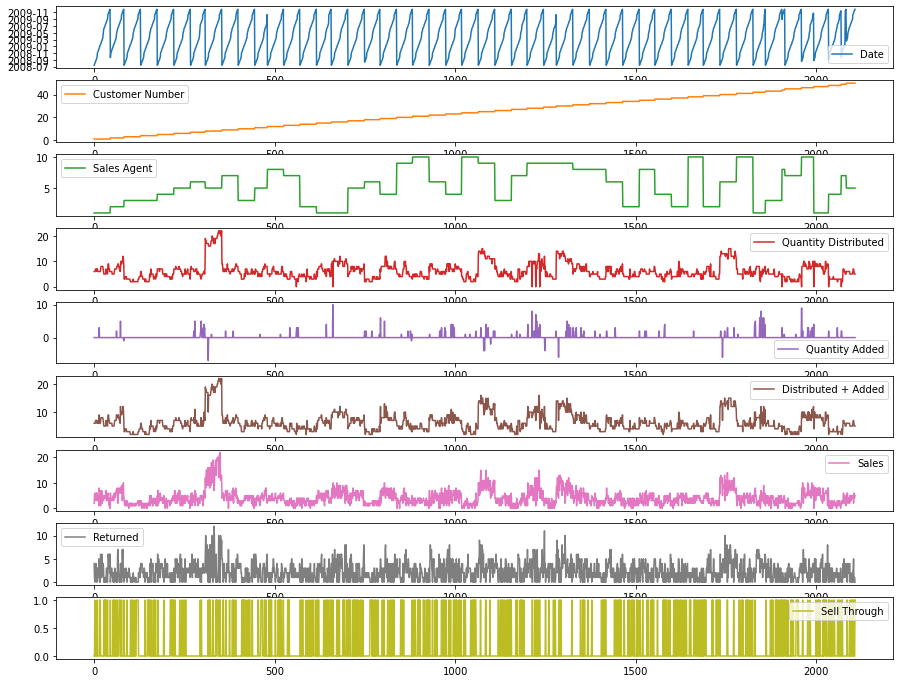

In [20]:
yedioth_raw_data.plot(subplots=True, figsize=(15,12), sharex=False, sharey=False)

array([<AxesSubplot:>], dtype=object)

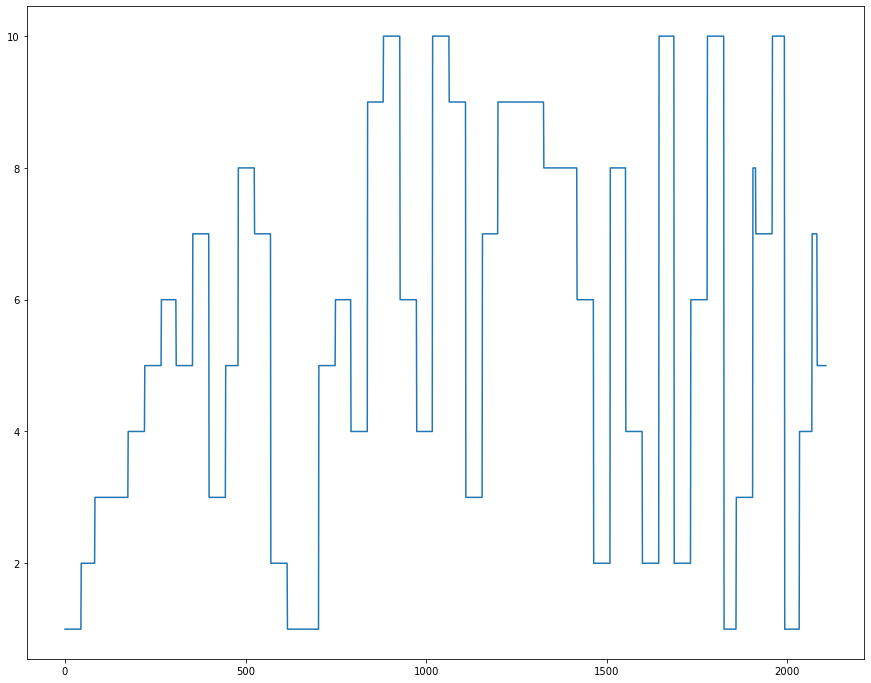

In [21]:
yedioth_raw_data['Sales Agent'].plot(subplots=True, figsize=(15,12), sharex=False, sharey=False)

array([<AxesSubplot:xlabel='Customer Number'>], dtype=object)

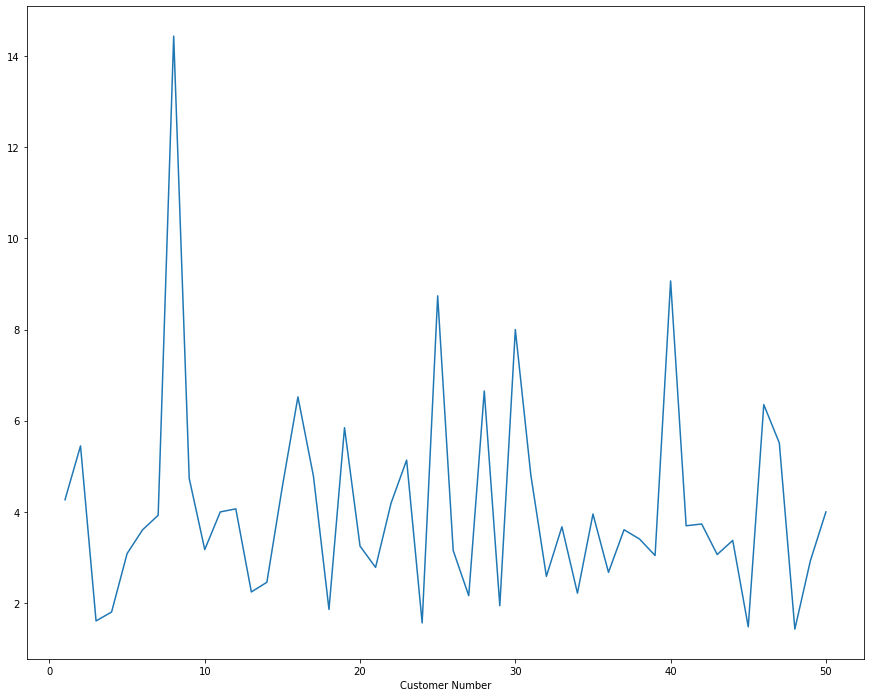

In [23]:
grouped_average['Sales'].describe()['mean'].plot(subplots=True, figsize=(15,12), sharex=False, sharey=False)

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

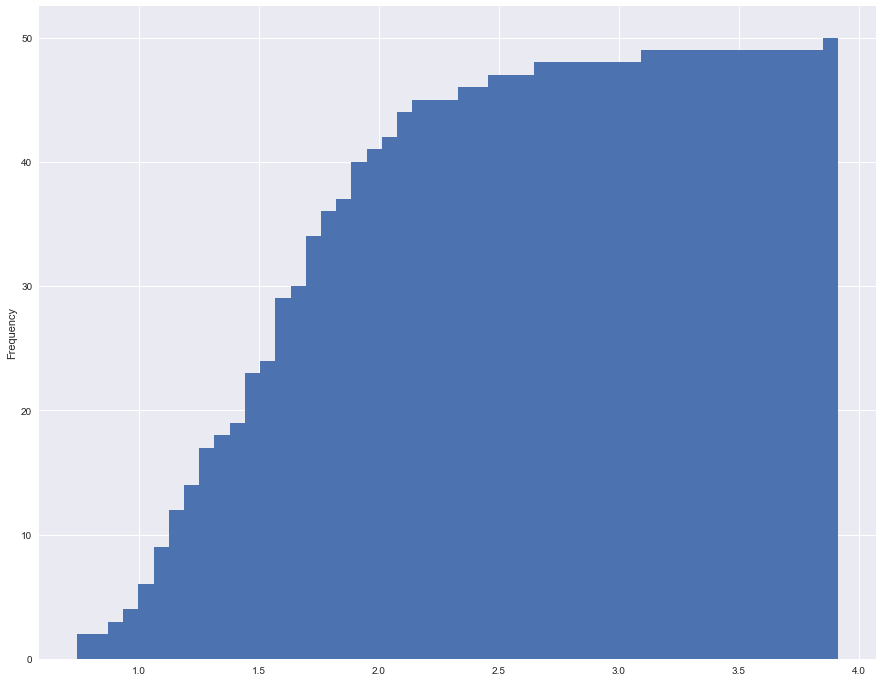

In [31]:
grouped_average['Sales'].describe()['std'].plot(kind="hist", 
                                                 subplots=True, 
                                                 figsize=(15,12), 
                                                 bins=50,
                                                 sharex=False, 
                                                 sharey=False,
                                                 cumulative=True)

In [45]:
grouped_average['Sales'].describe().T.iloc[1:3]

Customer Number,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
mean,4.266667,5.447368,1.608696,1.804348,3.086957,3.608696,3.926829,14.434783,4.733333,3.173913,...,3.695652,3.735294,3.065217,3.375000,1.478261,6.352941,5.512195,1.428571,2.928571,4.000000
std,1.763261,1.940986,0.744708,1.185459,1.457945,1.731772,1.602970,3.913806,1.615268,1.371201,...,1.473764,2.093407,1.466700,0.916125,0.936640,1.920896,2.026351,1.065107,1.268814,1.224745


In [68]:
grouped_average['Sales'].describe().loc[:, ['mean','std']]

,mean,std
Customer Number,,
1,4.266667,1.763261
2,5.447368,1.940986
3,1.608696,0.744708
4,1.804348,1.185459
5,3.086957,1.457945
6,3.608696,1.731772
7,3.926829,1.602970
8,14.434783,3.913806
9,4.733333,1.615268


In [73]:
grouped_average['Sales'].describe().iloc[:, 1:3]

,mean,std
Customer Number,,
1,4.266667,1.763261
2,5.447368,1.940986
3,1.608696,0.744708
4,1.804348,1.185459
5,3.086957,1.457945
6,3.608696,1.731772
7,3.926829,1.602970
8,14.434783,3.913806
9,4.733333,1.615268


## Optimal Order Quantity with NewsVendor q*=u+k*sigma

In [100]:
mean_std_by_customer= grouped_average['Sales'].describe().iloc[:, 1:3]
optimal_news_vender_per_store = mean_std_by_customer
optimal_news_vender_per_store['optimal_q_star'] = mean_std_by_customer["mean"] + norm.ppf(0.99)* mean_std_by_customer['std']

In [101]:
norm.ppf(0.99)

2.3263478740408408

In [102]:
optimal_news_vender_per_store['rounded_optimal_up'] = optimal_news_vender_per_store['optimal_q_star'].apply(np.ceil)

In [103]:
optimal_news_vender_per_store

,mean,std,optimal_q_star,rounded_optimal_up
Customer Number,,,,
1,4.266667,1.763261,8.368626,9.0
2,5.447368,1.940986,9.962776,10.0
3,1.608696,0.744708,3.341145,4.0
4,1.804348,1.185459,4.562139,5.0
5,3.086957,1.457945,6.478644,7.0
6,3.608696,1.731772,7.637399,8.0
7,3.926829,1.602970,7.655895,8.0
8,14.434783,3.913806,23.539656,24.0
9,4.733333,1.615268,8.491009,9.0


In [107]:
optimal_news_vender_per_store.append(optimal_news_vender_per_store.sum().rename("Totals"))

,mean,std,optimal_q_star,rounded_optimal_up
Customer Number,,,,
1,4.266667,1.763261,8.368626,9.0
2,5.447368,1.940986,9.962776,10.0
3,1.608696,0.744708,3.341145,4.0
4,1.804348,1.185459,4.562139,5.0
5,3.086957,1.457945,6.478644,7.0
6,3.608696,1.731772,7.637399,8.0
7,3.926829,1.602970,7.655895,8.0
8,14.434783,3.913806,23.539656,24.0
9,4.733333,1.615268,8.491009,9.0


## Pooling by Agent solutions

In [188]:
grouped_by_sales_agent = yedioth_raw_data.groupby(by=["Sales Agent", "Customer Number"]).agg({"Sales": [np.sum, np.mean, np.std]})

In [189]:
grouped_by_sales_agent # Hey look ma - it's a Pivot Table!

Sales                     
                              sum       mean       std
Sales Agent Customer Number                           
1           1                 192   4.266667  1.763261
            15                187   4.560976  1.581910
            16                300   6.521739  2.008196
            42                127   3.735294  2.093407
            47                226   5.512195  2.026351
2           2                 207   5.447368  1.940986
            14                113   2.456522  1.129533
            34                102   2.217391  1.298085
            37                166   3.608696  1.584344
            39                140   3.043478  1.413530
3           3                  74   1.608696  0.744708
            4                  83   1.804348  1.185459
            10                146   3.173913  1.371201
            26                145   3.152174  1.475238
            43                141   3.065217  1.466700
4           5                 142   3.086957  1.457945
            19                269   5.847826  1.763423
            23                226   5.136364  2.097517
            36                123   2.673913  1.549973
            48                 50   1.428571  1.065107
5           6                 166   3.608696  1.731772
            8                 664  14.434783  3.913806
            11                140   4.000000  1.862951
            17                220   4.782609  1.698536
            50                100   4.000000  1.224745
6           7                 161   3.926829  1.602970
            18                 80   1.860465  0.804197
            22                193   4.195652  2.146000
            33                169   3.673913  1.606298
            40                417   9.065217  2.506899
7           9                 213   4.733333  1.615268
            13                101   2.244444  1.111010
            27                 93   2.162791  1.703361
            45                 68   1.478261  0.936640
            49                 41   2.928571  1.268814
8           12                183   4.066667  1.009050
            31                221   4.804348  1.939296
            32                119   2.586957  1.239643
            35                170   3.953488  1.661231
            44                 27   3.375000  0.916125
9           20                143   3.250000  1.740422
            25                402   8.739130  2.389187
            28                306   6.652174  3.107106
            29                 68   1.942857  1.258918
            30                368   8.000000  2.683282
10          21                128   2.782609  1.009137
            24                 72   1.565217  1.147987
            38                143   3.404762  1.083345
            41                170   3.695652  1.473764
            46                216   6.352941  1.920896

In [190]:
collapsed_aggregation = grouped_by_sales_agent.reset_index()

In [192]:
collapsed_aggregation.columns = ['Sales Agent', 'Customer Number', 'Sum of Sales', 'Mean of Sales', 'Std of Sales']
collapsed_aggregation['Variance of Sales'] = collapsed_aggregation['Std of Sales'].pow(2) # Std is sqrt(variance)

In [186]:
collapsed_aggregation.head()

,Sales Agent,Customer Number,Sum of Sales,Mean of Sales,Std of Sales,Variance of Sales
0,1,1,192,4.266667,1.763261,3.109091
1,1,15,187,4.560976,1.581910,2.502439
2,1,16,300,6.521739,2.008196,4.032850
3,1,42,127,3.735294,2.093407,4.382353
4,1,47,226,5.512195,2.026351,4.106098


In [198]:
def root_of_sum_of_squares(x):
    x = np.array(x)
    return np.sqrt(np.sum(x))

pooled_by_agent = collapsed_aggregation.groupby(by='Sales Agent').agg({"Mean of Sales": [np.sum], "Variance of Sales": [root_of_sum_of_squares]})

In [201]:
pooled_by_agent.columns = ["Sales", "Std Dev"]

In [203]:
pooled_by_agent["Optimal Order Quantity"] = pooled_by_agent["Sales"] + norm.ppf(0.99)* pooled_by_agent['Std Dev']

In [204]:
pooled_by_agent

,Sales,Std Dev,Optimal Order Quantity
Sales Agent,,,
1,24.596871,4.258266,34.503079
2,16.773455,3.352090,24.571583
3,12.804348,2.857907,19.452834
4,18.173631,3.629285,26.616611
5,30.826087,5.115909,42.727470
6,22.722077,4.084886,32.224943
7,13.547401,3.038430,20.615847
8,18.786459,3.148768,26.111590
9,28.584161,5.213086,40.711612


In [205]:
pooled_by_agent.append(pooled_by_agent.sum().rename("Totals"))

,Sales,Std Dev,Optimal Order Quantity
Sales Agent,,,
1,24.596871,4.258266,34.503079
2,16.773455,3.352090,24.571583
3,12.804348,2.857907,19.452834
4,18.173631,3.629285,26.616611
5,30.826087,5.115909,42.727470
6,22.722077,4.084886,32.224943
7,13.547401,3.038430,20.615847
8,18.786459,3.148768,26.111590
9,28.584161,5.213086,40.711612
